# Import Library

In [13]:
import pandas as pd
import json
import tensorflow as tf
import os
import re
import numpy as np
import time
import matplotlib.pyplot as plt
import collections
import random
import requests
import json
from math import sqrt
from PIL import Image
from tqdm.auto import tqdm
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Create Dataframe with image paths and captions

In [3]:
# Define the path prefix for the images
image_path_prefix = "../data/train2017"

# Load data from the JSON file
with open('../data/selected_data_10000.json', 'r') as json_file:
    data = json.load(json_file)

image_paths = []
captions = []

# Create image paths and captions using a loop
for item in data:
    image_id = item["image_id"]
    img_name = '%012d.jpg' % image_id
    image_path = f"{image_path_prefix}/{img_name}"
    caption = item["caption"]

    image_paths.append(image_path)
    captions.append(caption)

df = pd.DataFrame({'image': image_paths, 'caption': captions})
df.head(10)


,image,caption
0,../data/train2017/000000006846.jpg,an old man riding a ox and pulling a wagon
1,../data/train2017/000000358113.jpg,A small boy laying on the ground with a large ...
2,../data/train2017/000000023025.jpg,A girl in a striped shirt looks at a laptop sc...
3,../data/train2017/000000481971.jpg,A woman throwing an object into a yellow basket
4,../data/train2017/000000306219.jpg,Dog riding on the back of a bicycle on a city ...
5,../data/train2017/000000337661.jpg,Tennis partners grapple with a difficult ball ...
6,../data/train2017/000000277470.jpg,A group of bikes locked outside a shop.
7,../data/train2017/000000425036.jpg,A man riding skis down a snow covered slope.
8,../data/train2017/000000488731.jpg,A man water skiing while holding a woman above...
9,../data/train2017/000000574497.jpg,A lone person sits on a snow covered bench wit...


# Data Cleaning

In [4]:
def cleaning(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespaces
    text = re.sub('\s+', ' ', text)
    # Remove punctuation and special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Remove leading and trailing whitespaces
    text = text.strip()
    # Add start and end tokens
    text = '[start] ' + text + ' [end]'
    return text

In [5]:
# Apply data cleaning to the captions column
df['caption'] = df['caption'].apply(cleaning)
df.head()

,image,caption
0,../data/train2017/000000006846.jpg,[start] an old man riding a ox and pulling a w...
1,../data/train2017/000000358113.jpg,[start] a small boy laying on the ground with ...
2,../data/train2017/000000023025.jpg,[start] a girl in a striped shirt looks at a l...
3,../data/train2017/000000481971.jpg,[start] a woman throwing an object into a yell...
4,../data/train2017/000000306219.jpg,[start] dog riding on the back of a bicycle on...


# Display images with captions

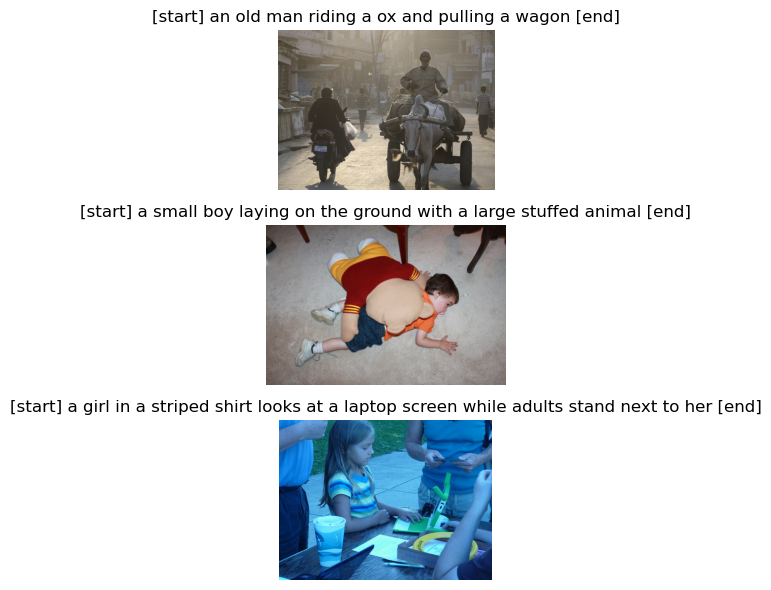

In [10]:
# Display some images and captions
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))

for ax, (image_path, caption) in zip(axes.flatten(), zip(df['image'][:3], df['caption'][:3])):
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title(caption)
    ax.axis('off')

plt.tight_layout()
plt.show()